<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/DecisionTrees%26RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Trees**

1.   import data
2.   select the target variable and features
3.   select the model
4.   split the data into training and validation(test)
5.   fit the model on the training data
6.   make predictions for val_X
7.   calculate the accuracy



You can find the data here:
https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

Also, check out the blog post here: 
https://www.mehrdadk.com/blog/decision-trees-amp-random-forests

In [ ]:
import pandas as pd
melbourne_data = pd.read_csv('melb_data.csv')
melbourne_data.describe() 

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
melbourne_data.columns
melbourne_data = melbourne_data.dropna(axis= 0)
y = melbourne_data['Price']
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]


**Spliting the data int train and validation(test)**

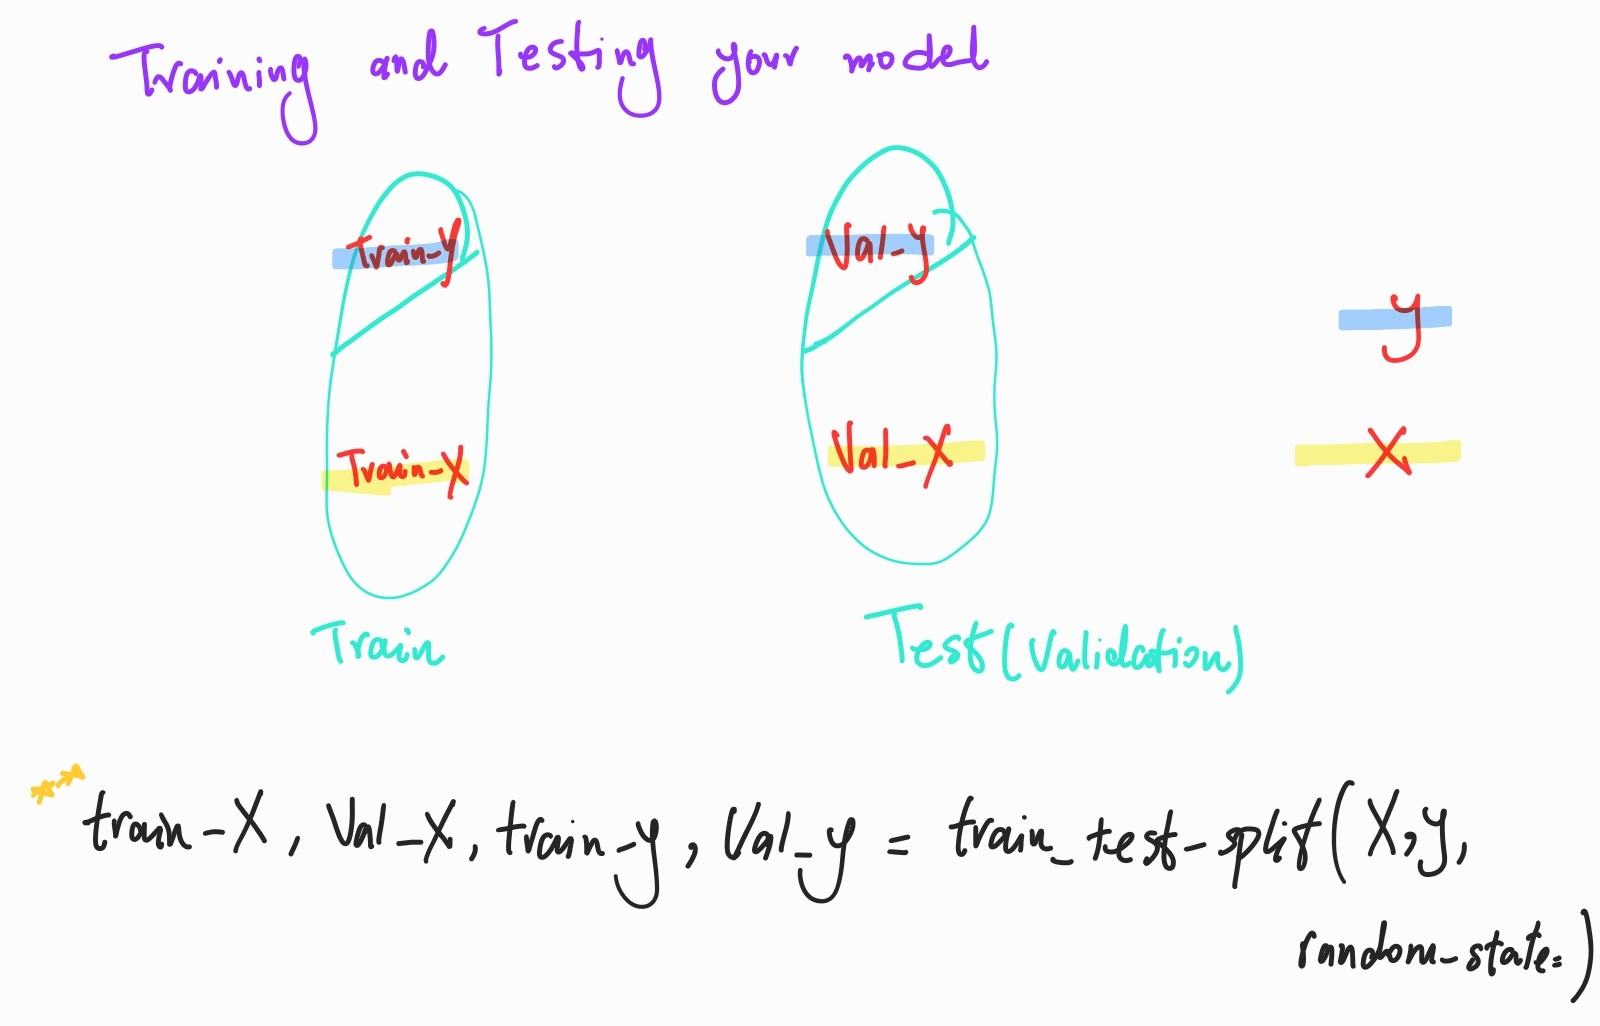

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 0)

melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import mean_absolute_error

val_prediction = melbourne_model.predict(val_X)
print(f"the mean absolute error in validation data using decision tree is {mean_absolute_error(val_y,val_prediction)}")

the mean absolute error in validation data using decision tree is 270522.5261459006


**Find the optimal number of leaves**
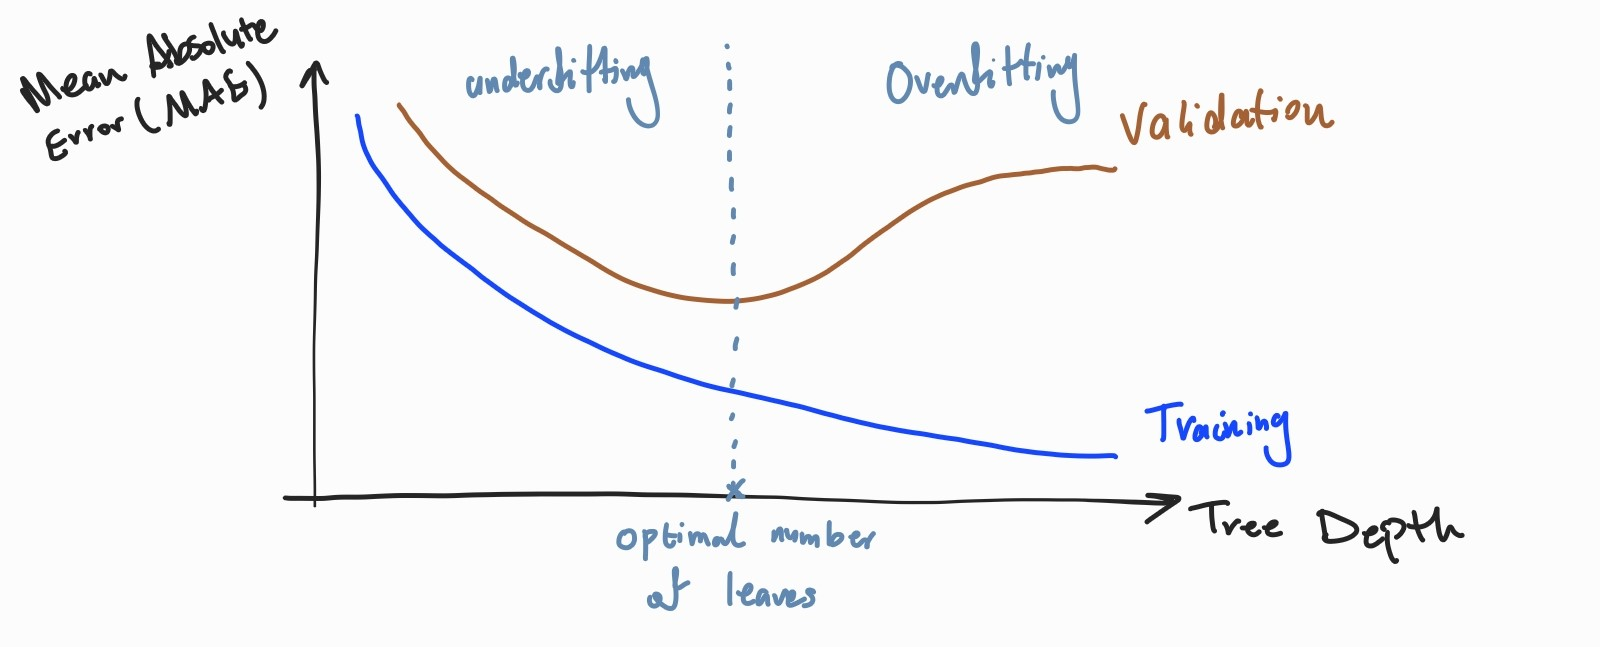

In [ ]:

def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
  model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes)

  model.fit(train_X,train_y)
  predictions = model.predict(val_X)
  mae = mean_absolute_error(val_y, predictions)
  return (mae)



for max_leaf_nodes in [5,50,500,5000]:
  print(f" the MAE with {max_leaf_nodes} max leaf nodes is \t\t{get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y)}\n")


 the MAE with 5 max leaf nodes is 		385696.54278937966

 the MAE with 50 max leaf nodes is 		279794.61143891385

 the MAE with 500 max leaf nodes is 		261104.6905971414

 the MAE with 5000 max leaf nodes is 		275583.39358726057



Of the options listed, 500 is the optimal number of leaves

**Random Forest**
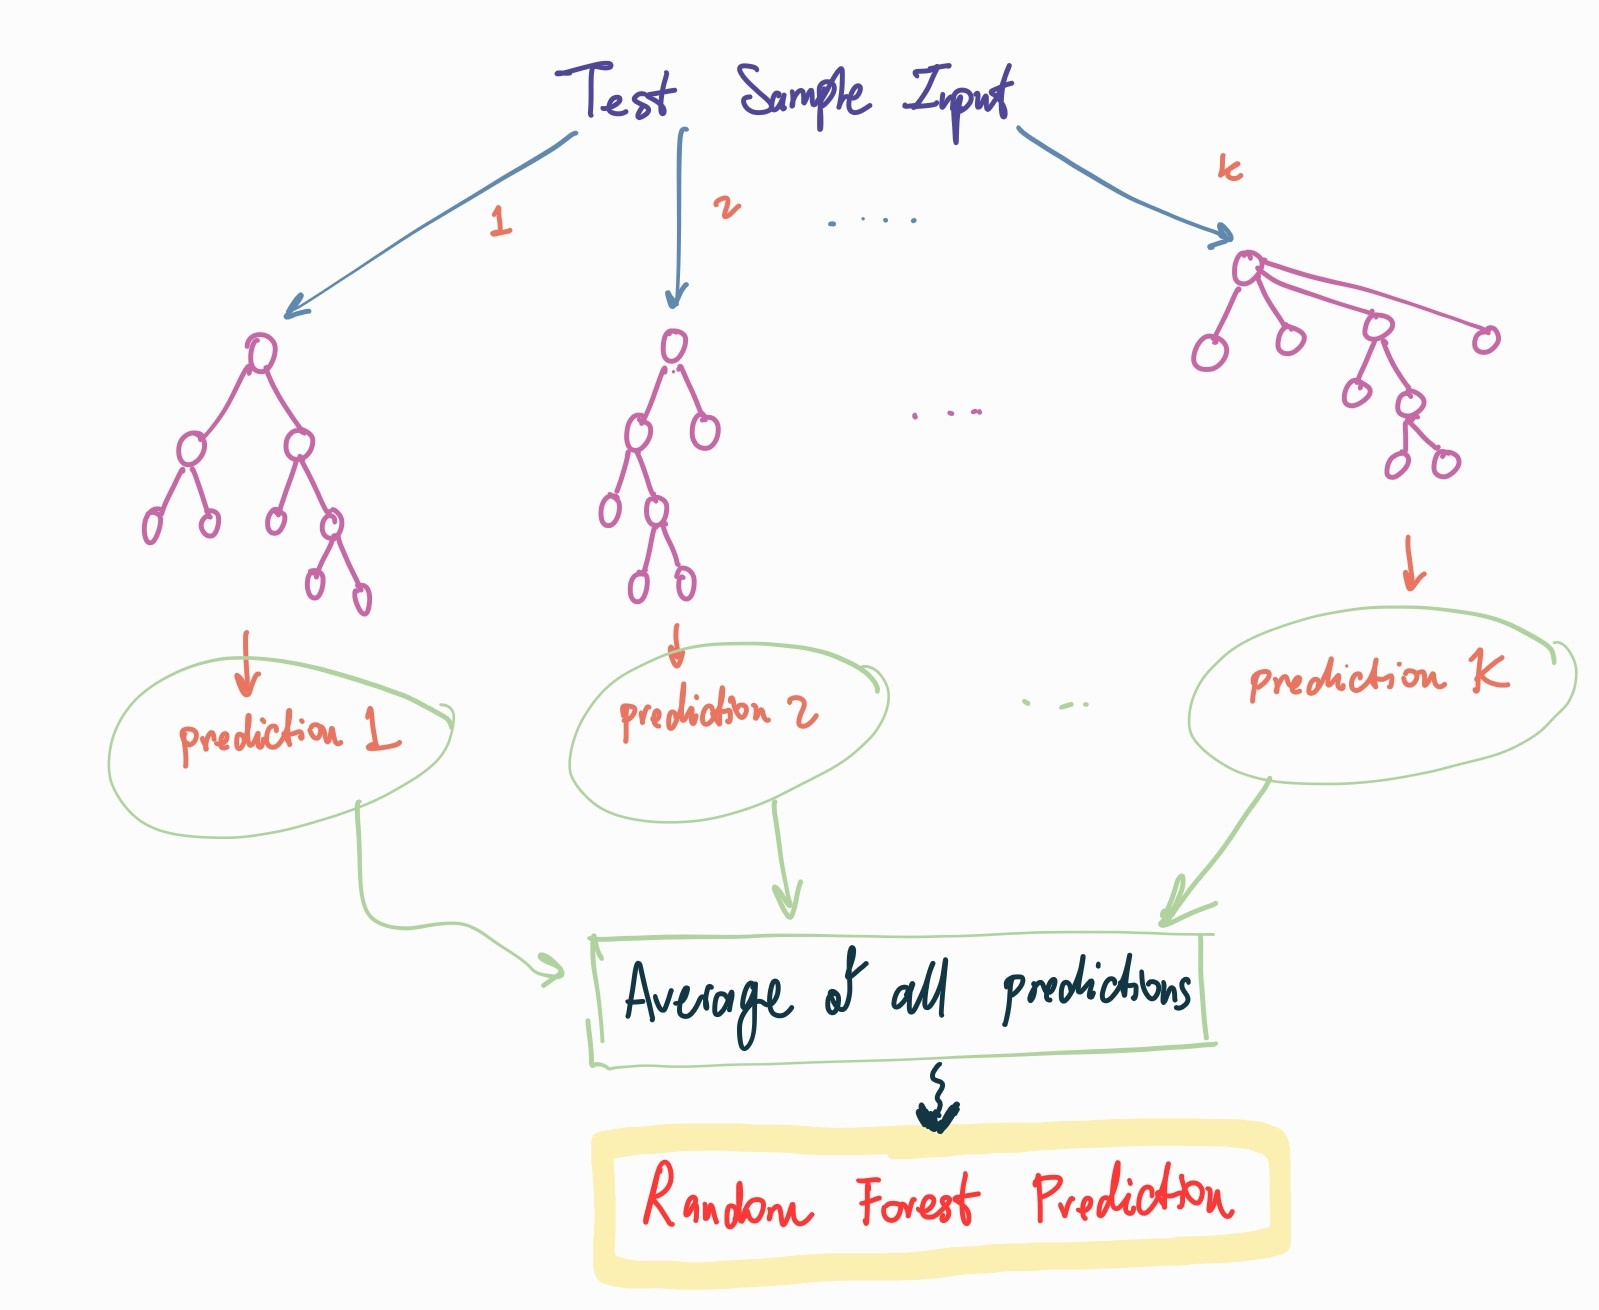

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_y)
forest_predict = forest_model.predict(val_X)
print(f"the mean absolute error in validation data using random forest is {mean_absolute_error(val_y,forest_predict)}")


the mean absolute error in validation data using random forest is 207190.6873773146


As you can see the mean absolute error is much lower with random forest.